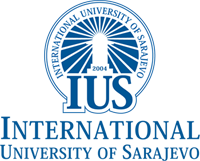

---



# ML Project (Movie revenue prediction model)

Problem: For given dataset which includes wide informations of a movie , we have to build a model which will precisely predict the worldwide revenue for a movie. 

## Introduction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [372]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(sparse_output=True)

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()

! pip install ann_visualizer
from ann_visualizer.visualize import ann_viz;

from sklearn.metrics import r2_score ,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

import matplotlib.pyplot as plt

import pandas_profiling

import seaborn as sns 

from sklearn.tree import export_graphviz

from keras.models import Sequential

from keras.layers import Dense

import pandas as pd 

import numpy as np

import collections

import statistics

import copy

import math

import json 

import ast

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


%matplotlib inline
plt.style.use('seaborn')
pd.set_option('max_columns', None)

movie_dataset = pd.read_csv('drive/MyDrive/new.csv')

# Analyzing dataset

In [373]:
# Prints information about dataset 
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [374]:
# We print first 5 rows of dataset
movie_dataset.head()

adult                              belongs_to_collection    budget  \
0  FALSE  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  FALSE                                                NaN  65000000   
2  FALSE  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  FALSE                                                NaN  16000000   
4  FALSE  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
1  When siblings Judy and Peter discover an encha...    17.0155   
2  A family wedding reignites the ancient feud be...    11.7129   
3  Cheated on, mistreated and stepped on, the wom...    3.85949   
4  Just when George Banks has recovered from his ...    8.38752   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3  [{'name': 'Twentieth Century Fox Film Corporat...   
4  [{'name': 'Sandollar Productions', 'id': 5842}...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   10/30/1995   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   12/15/1995   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   12/22/1995   
3  [{'iso_3166_1': 'US', 'name': 'United States o...   12/22/1995   
4  [{'iso_3166_1': 'US', 'name': 'United States o...    2/10/1995   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0    127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0    106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  \
0                    Toy Story  False           7.7      5415.0   
1                      Jumanji  False           6.9      2413.0   
2             Grumpier Old Men  False           6.5        92.0   
3            Waiting to

In [375]:
# prints the number of missing data for all rows in a descanding order

movie_dataset.isnull().sum().sort_values(ascending=False)

belongs_to_collection    40972
homepage                 37684
tagline                  25054
overview                   954
poster_path                386
runtime                    263
release_date                87
status                      87
cast                        32
crew                        32
imdb_id                     17
original_language           11
revenue                      6
spoken_languages             6
title                        6
video                        6
vote_average                 6
vote_count                   6
popularity                   5
keywords                     4
production_countries         3
production_companies         3
id                           0
original_title               0
genres                       0
budget                       0
adult                        0
dtype: int64

In [376]:
# We drop rows with missing values for the next features 

movie_dataset = movie_dataset[movie_dataset.budget.notnull()]
movie_dataset = movie_dataset[movie_dataset.genres.notnull()]
movie_dataset = movie_dataset[movie_dataset.id.notnull()]
movie_dataset = movie_dataset[movie_dataset.imdb_id.notnull()]
movie_dataset = movie_dataset[movie_dataset.original_language.notnull()]
movie_dataset = movie_dataset[movie_dataset.popularity.notnull()]
movie_dataset = movie_dataset[movie_dataset.production_companies.notnull()]
movie_dataset = movie_dataset[movie_dataset.production_countries.notnull()]
movie_dataset = movie_dataset[movie_dataset.release_date.notnull()]
movie_dataset = movie_dataset[movie_dataset.revenue.notnull()]
movie_dataset = movie_dataset[movie_dataset.runtime.notnull()]
movie_dataset = movie_dataset[movie_dataset.title.notnull()]
movie_dataset = movie_dataset[movie_dataset.vote_count.notnull()]
movie_dataset = movie_dataset[movie_dataset.vote_average.notnull()]
movie_dataset = movie_dataset[movie_dataset.cast.notnull()]
movie_dataset = movie_dataset[movie_dataset.crew.notnull()]
movie_dataset = movie_dataset[movie_dataset.keywords.notnull()]

# We drop rows with zero value for revenue
movie_dataset = movie_dataset[movie_dataset.revenue != 0]

In [377]:
# We reset the index for dataset and drop useless features 

movie_dataset = movie_dataset.reset_index(drop=True)
movie_dataset.reset_index(drop=True, inplace=True) 
movie_dataset= movie_dataset.drop(columns = ['id' , 'imdb_id', 'poster_path','overview','tagline',
                  'original_title','title','status','adult','video'])


In [378]:
# prints the number of missing data for all rows in a descanding order

movie_dataset.isnull().sum().sort_values(ascending=False)

belongs_to_collection    5903
homepage                 5024
production_countries        0
budget                      0
genres                      0
original_language           0
popularity                  0
production_companies        0
keywords                    0
crew                        0
revenue                     0
runtime                     0
spoken_languages            0
vote_average                0
vote_count                  0
cast                        0
release_date                0
dtype: int64

# Analyzing and exploring data

In [379]:
# We convert the budget and popularity feature to a numeric type , it was string previously  
movie_dataset[['budget']] = movie_dataset[['budget']].apply(pd.to_numeric) 
movie_dataset[['popularity']] = movie_dataset[['popularity']].apply(pd.to_numeric) 


# For these features we change datatype to a dictionary instead of a string type
text_cols = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'keywords', 'cast', 'crew']

def text_to_dict(df):
    for col in text_cols:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

movie_dataset = text_to_dict(movie_dataset)

In [380]:
# The number of outliners in each numerical feature

Q1 = movie_dataset.quantile(0.25)
Q3 = movie_dataset.quantile(0.75)
IQR = Q3 - Q1
((movie_dataset < (Q1 - 1.5 * IQR)) | (movie_dataset > (Q3 + 1.5 * IQR))).sum()[((movie_dataset < (Q1 - 1.5 * IQR)) | (movie_dataset > (Q3 + 1.5 * IQR))).sum() != 0]

budget          614
popularity      194
revenue         837
runtime         274
vote_average    132
vote_count      858
dtype: int64

### Belongs to collection

In [381]:
# A example of the belongs to colection feature 
movie_dataset['belongs_to_collection'][0]

{'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg',
 'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg'}

In [382]:
# We made a new list which stores 1 if movie belongs to collection and 0 if not
part_of_collection = movie_dataset['belongs_to_collection'].apply(lambda x: 1 if len(x) > 0 else 0)

In [383]:
part_of_collection

0       1
1       0
2       0
3       1
4       0
       ..
7370    0
7371    0
7372    0
7373    0
7374    0
Name: belongs_to_collection, Length: 7375, dtype: int64

In [384]:
# We print the correleation and the number of movies which belong to a collection
pearsonr(part_of_collection, movie_dataset['revenue']) , sum(part_of_collection)

((0.32700666664676586, 2.4346203973155756e-183), 1472)

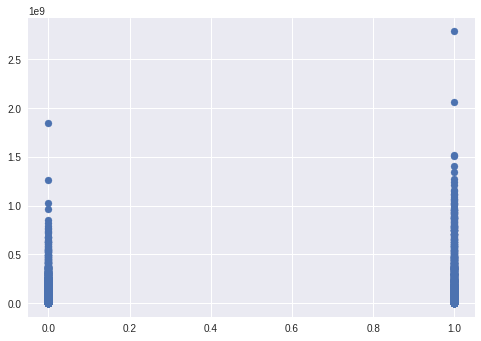

In [385]:
# Scatter plot of part of collection list compared to revenue
plt.scatter(part_of_collection, movie_dataset['revenue'])
plt.show()

In [386]:
# print median revenue of movies which do not belong to a collection
movie_dataset.revenue[part_of_collection==1].median() , sum(part_of_collection)

(66001002.0, 1472)

In [387]:
# print median revenue of movies which do belong to a collection
movie_dataset['revenue'][part_of_collection==0].median() 

11850214.0

In [388]:
# Now the column will store 1 and 0 instead of a dictionary
movie_dataset.belongs_to_collection = part_of_collection

### Keywords

In [389]:
# This is how extracting values from this variable work , we have a list of lists filled with dictionaries
print(movie_dataset['keywords'][0])
print("\n")
print(movie_dataset['keywords'][0][0])
print("\n" + movie_dataset['keywords'][0][0]['name'])

[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]


{'id': 931, 'name': 'jealousy'}

jealousy


In [390]:
# Here we extract all keywords in vector and extract them in a 2d matrix
allkeywords=[]

def getkey(row):
    x = []
    for i in row:
        allkeywords.append(i['name'])
        x.append(i['name'])
    return x

keywords = movie_dataset['keywords'].apply(lambda x: getkey(x))

In [391]:
# Printing maximal number of keyword values in a single movie
key_num = movie_dataset['keywords'].apply(lambda x: len(x) if x != {} else 0)
print(max(key_num))

149


In [392]:
# We put all keywords in a set , so we dont have any duplicate
set1 = set(allkeywords);

In [393]:
# We print the number of keyword classes 
len(set1)

11896

Text(0.5, 1.0, 'Hist for number of keywords')

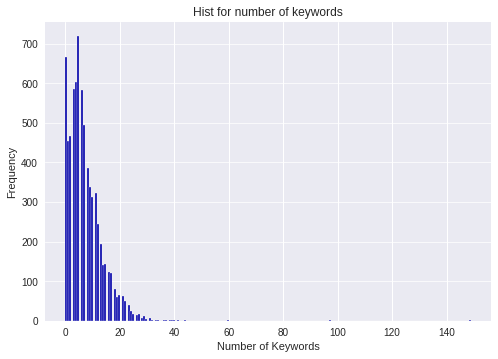

In [394]:
# Histogram for number of keywords in a movie 
n, bins, patches = plt.hist(x=key_num, bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Number of Keywords')
plt.ylabel('Frequency')
plt.title('Hist for number of keywords')

In [395]:
# describing number of keywords 
key_num.describe()

count    7375.000000
mean        7.225220
std         6.226849
min         0.000000
25%         3.000000
50%         6.000000
75%        10.000000
max       149.000000
Name: keywords, dtype: float64

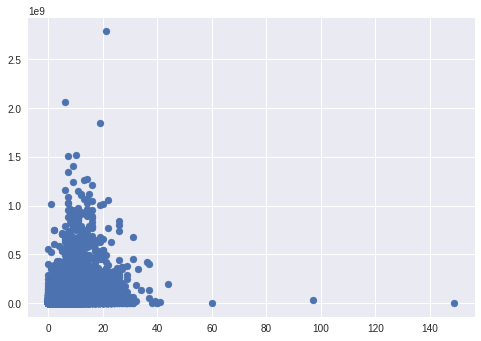

In [396]:
# Scatterplot for keyword number and revenue
plt.scatter(key_num, movie_dataset['revenue'])
plt.show()

In [397]:
# correlation between keyword number and revenue
pearsonr(key_num , movie_dataset['revenue'] )

(0.21754366575645767, 1.0205979800743075e-79)

In [398]:
# We will drop the keywords
movie_dataset = movie_dataset.drop(columns=['keywords'])

### homepage

In [399]:
# printing first values and the type
movie_dataset['homepage'][0] , type(movie_dataset['homepage'][0])

('http://toystory.disney.com/toy-story', str)

In [400]:
# Because we have a lot of missing data mostly because not all movies have a homepage and
# thats why we will make a new variable which defines does a movie contains/has a homepage

contain_homepage = movie_dataset['homepage'].isnull().apply(lambda x: 0 if x else 1 )

In [401]:
contain_homepage.head(5)

0    1
1    0
2    0
3    0
4    0
Name: homepage, dtype: int64

In [402]:
# number of movies which contain a homepage
sum(contain_homepage) 

2351

In [403]:
# Correlation
pearsonr(contain_homepage, movie_dataset['revenue']) 

(0.2494544960366943, 5.0998686357410774e-105)

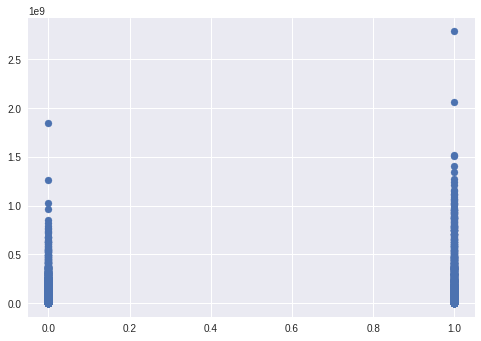

In [404]:
# Scatterplot
plt.scatter(part_of_collection, movie_dataset['revenue'])
plt.show()

In [405]:
# Median revenue of movies which have a homepage
movie_dataset['revenue'][contain_homepage==1].median()

35097815.0

In [406]:
# Median revenue of movies which do not have a homepage
movie_dataset['revenue'][contain_homepage==0].median()

13004404.0

In [407]:
# The binary representation will be used as a new feature instead of homepage links 
movie_dataset.homepage = contain_homepage

### Genres

In [408]:
# Example of genre values
movie_dataset.genres[1]

[{'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 10751, 'name': 'Family'}]

In [409]:
# Here we made 3 new columns , one which will store number of genres in a movie ,
# one which will store all genre names and one which will store all names in a list

allgenres =[]
def getgenres(row):
    x = []
    for i in row:
        allgenres.append(i['name'])
        x.append(i['name'])    
    return x
    
genr = movie_dataset['genres'].apply(lambda x: getgenres(x))
gen_num = movie_dataset.genres.apply(lambda x: len(x))

In [410]:
setgen = set(allgenres)
print('We have ' + str(len(setgen)) + ' different genres \n') 
setgen

We have 20 different genres 



{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

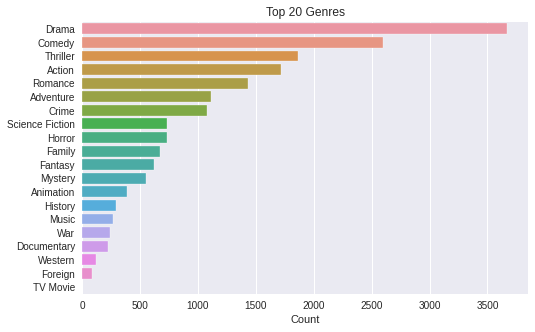

In [411]:
genres_count = collections.Counter([i for j in genr for i in j]).most_common()
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in genres_count],[val[0] for val in genres_count])
plt.xlabel('Count')
plt.title('Top 20 Genres')
plt.show()

In [412]:
# Summary of number of genres in a movie
gen_num.describe()

count    7375.000000
mean        2.495051
std         1.118523
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         8.000000
Name: genres, dtype: float64

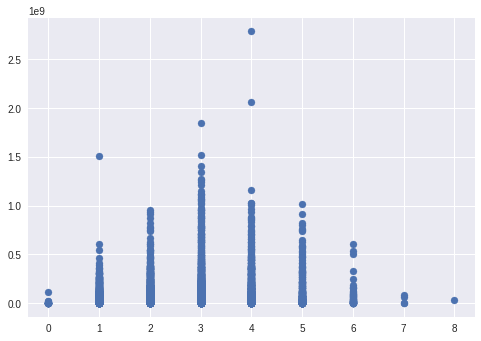

In [413]:
# Scatter plot of genres number to revenue

plt.scatter(gen_num, movie_dataset['revenue'])
plt.show()

In [414]:
# Correlation
pearsonr(gen_num , movie_dataset.revenue)

(0.17592403990155628, 2.4399298527210844e-52)

In [415]:
# Top 5 examples of filtered genre columns
genr.head()

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2            [Comedy, Drama, Romance]
3                            [Comedy]
4    [Action, Crime, Drama, Thriller]
Name: genres, dtype: object

In [416]:
# We will use the filtered version now
movie_dataset.genres = genr

### Crew 


In [417]:
# Example of crew value and how to use dictionarie in python
print(movie_dataset['crew'][0])
print("\n")
print(movie_dataset['crew'][0][0])
print("\n" + movie_dataset['crew'][0][0]['name'])

[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, 'job': 'Director', 'name': 'John Lasseter', 'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'}, {'credit_id': '52fe4284c3a36847f8024f4f', 'department': 'Writing', 'gender': 2, 'id': 12891, 'job': 'Screenplay', 'name': 'Joss Whedon', 'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'}, {'credit_id': '52fe4284c3a36847f8024f55', 'department': 'Writing', 'gender': 2, 'id': 7, 'job': 'Screenplay', 'name': 'Andrew Stanton', 'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'}, {'credit_id': '52fe4284c3a36847f8024f5b', 'department': 'Writing', 'gender': 2, 'id': 12892, 'job': 'Screenplay', 'name': 'Joel Cohen', 'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'}, {'credit_id': '52fe4284c3a36847f8024f61', 'department': 'Writing', 'gender': 0, 'id': 12893, 'job': 'Screenplay', 'name': 'Alec Sokolow', 'profile_path': '/v79vlRYi94BZUQnkkyznbGUZLjT.jpg'}, {'credit_id': '52fe4284c3a36847f8024f67', 'depart

In [418]:
# Here we get the number a crew from every movie
def getcrewnum(row):
    return len(row)

crewnumber = movie_dataset['crew'].apply(lambda x: getcrewnum(x))

In [419]:
# Summary
crewnumber.describe()

count    7375.000000
mean       24.378576
std        28.146005
min         0.000000
25%         8.000000
50%        14.000000
75%        28.000000
max       194.000000
Name: crew, dtype: float64

In [420]:
# Correlation
pearsonr(crewnumber,movie_dataset['revenue'])

(0.4037149265267377, 3.283978415538979e-287)

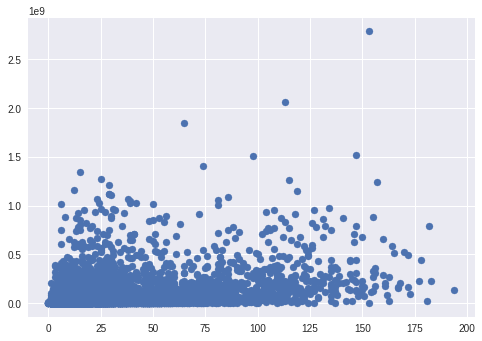

In [421]:
# Scatterplot 
plt.scatter(crewnumber, movie_dataset['revenue'])
plt.show()

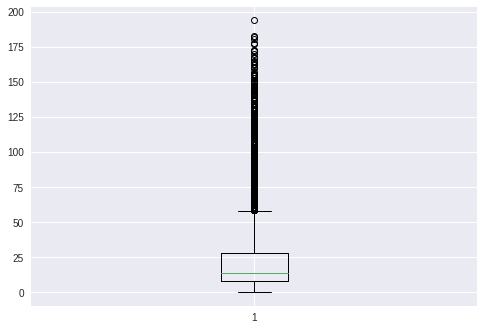

In [422]:
plt.boxplot(crewnumber)  # We can clearly see a lot of outliners in out boxplot
plt.show()              

In [423]:
#Next i will take the directors name and make a category from it
def getdir(row):
    for i in row:
        if i['job'] == 'Director':
            return i['name']

directors = movie_dataset['crew'].apply(lambda x: getdir(x))

In [424]:
directors.head(5)

0      John Lasseter
1       Joe Johnston
2    Forest Whitaker
3      Charles Shyer
4       Michael Mann
Name: crew, dtype: object

In [425]:
setd = set(directors);
len(setd) # We have 3358 different directors

3358

In [426]:
# We us ethe filtered version and add cresnumber as a new column in our dataset
movie_dataset.crew = directors
movie_dataset['crew_number'] = crewnumber

### Cast 

In [427]:
# Example of our feature
print(movie_dataset['cast'][0])
print("\n")
print(movie_dataset['cast'][0][0])
print("\n" + movie_dataset['cast'][0][0]['name'])

[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4tN

In [428]:
# get number of cast in a movie
def getcastnum(row):
    return len(row)

castnumber = movie_dataset['cast'].apply(lambda x: getcastnum(x))

In [429]:
# Summary of cast number in  am movie 
castnumber.describe()

count    7375.000000
mean       21.029695
std        17.427678
min         0.000000
25%        11.000000
50%        16.000000
75%        24.000000
max       165.000000
Name: cast, dtype: float64

In [430]:
# Correlation between cats number and revenue of a movie 
pearsonr(castnumber , movie_dataset['revenue'])

(0.3734723207881634, 7.74218587980998e-243)

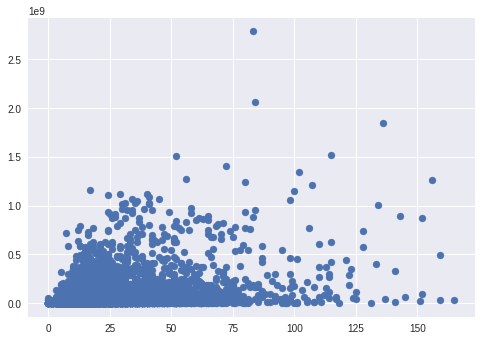

33

In [431]:
# scatter plot 
plt.scatter(castnumber, movie_dataset['revenue'])
plt.show()
len(castnumber[castnumber == 0])

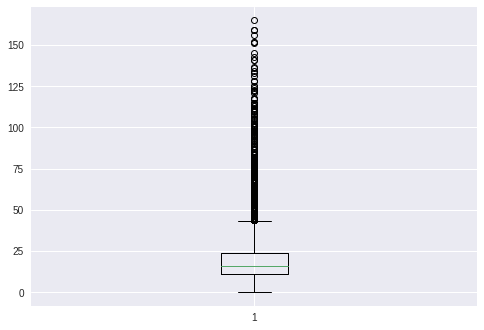

33

In [432]:
# Boxplot of castnumber 
plt.boxplot(castnumber)
plt.show()
sum(castnumber==0) 

In [433]:
# Here we will get top 3 actors from every movie and all those names in a vector

def getactorsformovie(row):
    x = []
    for i in row:
        if i['order'] in (0,1,2):
            x.append(i['name'])
    return x

castpeople =[]

for row in movie_dataset['cast']:
    for single in row:
        if single['order'] in (0,1,2):
            castpeople.append(single['name'])
        
castnames = movie_dataset['cast'].apply(lambda x: getactorsformovie(x))


In [434]:
castnames.head(5)

0                  [Tom Hanks, Tim Allen, Don Rickles]
1       [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2    [Whitney Houston, Angela Bassett, Loretta Devine]
3           [Steve Martin, Diane Keaton, Martin Short]
4              [Al Pacino, Robert De Niro, Val Kilmer]
Name: cast, dtype: object

In [435]:
setact = set(castpeople)

In [436]:
len(setact) # number of different names

8328

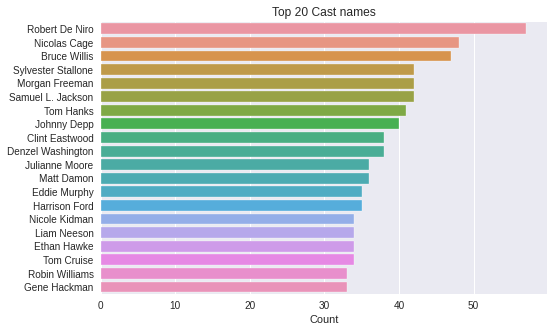

In [437]:
cast_count = collections.Counter([i for j in castnames for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in cast_count],[val[0] for val in cast_count])
plt.xlabel('Count')
plt.title('Top 20 Cast names')
plt.show()

In [438]:
# Put cleaned data and add new column to dataset
movie_dataset.cast = castnames
movie_dataset['cast_number'] = castnumber

### Popularity 

In [439]:
# Top 10 values
movie_dataset['popularity'].head(10)

0    21.946943
1    17.015539
2     3.859495
3     8.387519
4    17.924927
5     5.231580
6    14.686036
7     6.318445
8    12.140733
9     5.092000
Name: popularity, dtype: float64

In [440]:
# Summary of popularity
movie_dataset['popularity'].describe()

count    7375.000000
mean        8.440219
std        11.668474
min         0.000001
25%         3.932324
50%         7.423812
75%        10.890880
max       547.488298
Name: popularity, dtype: float64

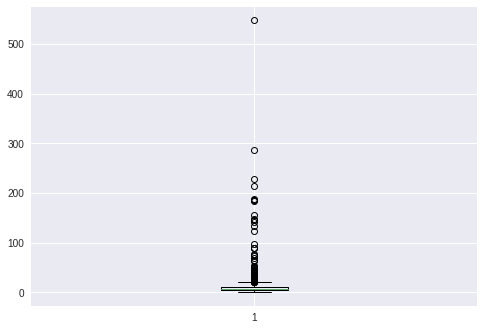

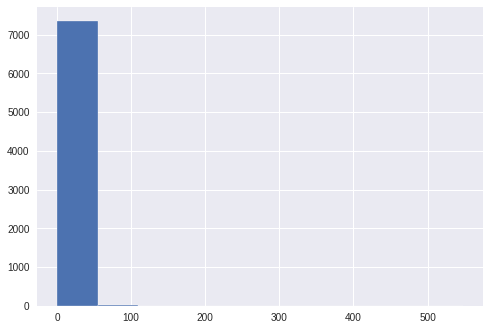

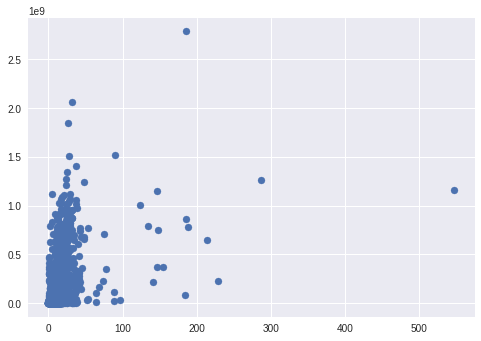

In [441]:
# Boxplot , histogram and scatterplot
plt.boxplot(movie_dataset['popularity']) 
plt.show()
plt.hist(movie_dataset['popularity'])
plt.show()
plt.scatter(movie_dataset['popularity'] , movie_dataset['revenue'])
plt.show()

In [442]:
# Correlation 
pearsonr(movie_dataset['popularity'] , movie_dataset['revenue'])

(0.458689982221428, 0.0)

### Release date 

In [443]:
# Change from string to date time type
movie_dataset.release_date = pd.to_datetime(movie_dataset.release_date,  errors='coerce')

In [444]:
# We extract the year , month and day of the week from date 
# And we drop the release date feature
 
release_year = pd.DatetimeIndex(movie_dataset['release_date']).year
release_month = pd.DatetimeIndex(movie_dataset['release_date']).month
release_dow = pd.DatetimeIndex(movie_dataset['release_date']).dayofweek

movie_dataset = movie_dataset.drop(columns=['release_date'])

movie_dataset['release_dow']= release_dow
movie_dataset['release_year'] = release_year
movie_dataset['release_month'] = release_month

In [445]:
# Summary of new added columns
print('For day of the week release :\n')
print('Median is :' + str(movie_dataset['release_dow'].median()))
print(movie_dataset['release_dow'].describe())
print('\nFor month release :\n')
print('Median is :' + str(movie_dataset['release_month'].median()))
print(movie_dataset['release_month'].describe())
print('\nFor year release :\n')
print('Median is :' + str(movie_dataset['release_year'].median()))
print(movie_dataset['release_year'].describe())

For day of the week release :

Median is :4.0
count    7375.000000
mean        3.247051
std         1.327857
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: release_dow, dtype: float64

For month release :

Median is :7.0
count    7375.000000
mean        6.845831
std         3.387378
min         1.000000
25%         4.000000
50%         7.000000
75%        10.000000
max        12.000000
Name: release_month, dtype: float64

For year release :

Median is :2004.0
count    7375.000000
mean     1999.610576
std        15.465254
min      1915.000000
25%      1992.000000
50%      2004.000000
75%      2011.000000
max      2017.000000
Name: release_year, dtype: float64


In [446]:
# Crosstable for day of the week and month
days = pd.crosstab(index=movie_dataset["release_dow"], columns="count") 
months = pd.crosstab(index=movie_dataset["release_month"], columns="count") 
days ,months 

(col_0        count
 release_dow       
 0              317
 1              465
 2             1227
 3             1430
 4             3239
 5              400
 6              297, col_0          count
 release_month       
 1                511
 2                516
 3                562
 4                558
 5                582
 6                591
 7                564
 8                658
 9                903
 10               695
 11               538
 12               697)

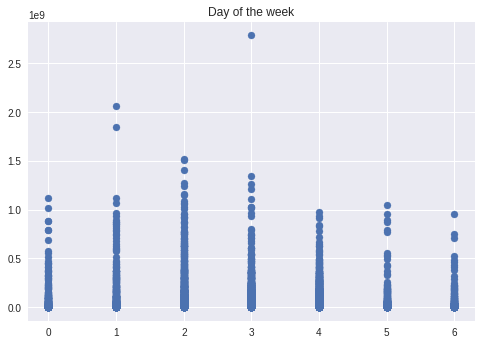

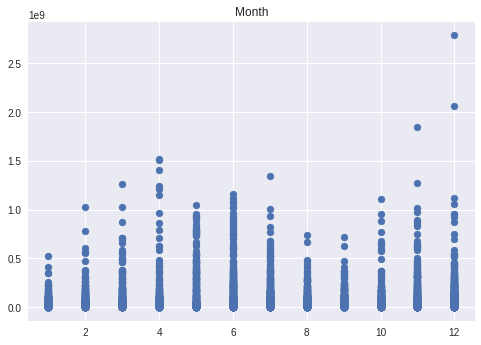

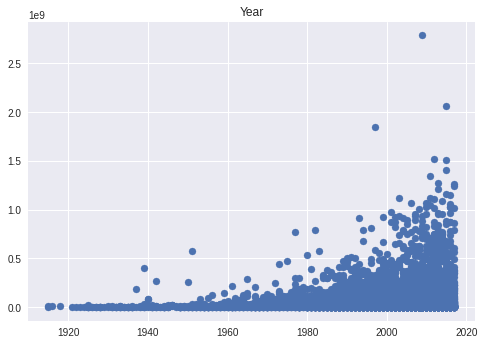

In [447]:
# scatter plots for new columns 
plt.scatter(movie_dataset.release_dow , movie_dataset.revenue)
plt.title('Day of the week')
plt.show()
plt.scatter(movie_dataset.release_month , movie_dataset.revenue)
plt.title('Month')
plt.show()
plt.scatter(movie_dataset.release_year , movie_dataset.revenue)
plt.title('Year')
plt.show()

In [448]:
# We will make the day of the week and month categorical
movie_dataset.release_dow = movie_dataset.release_dow.astype('category')
movie_dataset.release_month = movie_dataset.release_month.astype('category')

We have three new columns but we will use only the year because the other two are uniformal

### Runtime 

In [449]:
# top 5 examples
movie_dataset['runtime'].head()

0     81.0
1    104.0
2    127.0
3    106.0
4    170.0
Name: runtime, dtype: float64

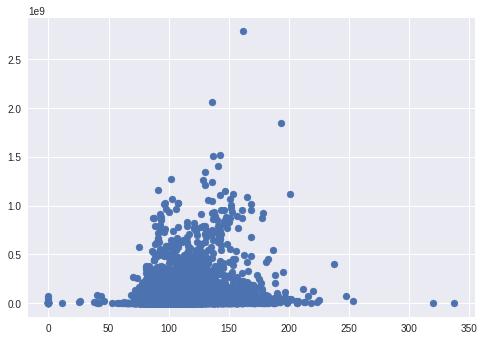

In [450]:
# Scatter plot 
plt.scatter(movie_dataset['runtime'] , movie_dataset['revenue'])
plt.show()

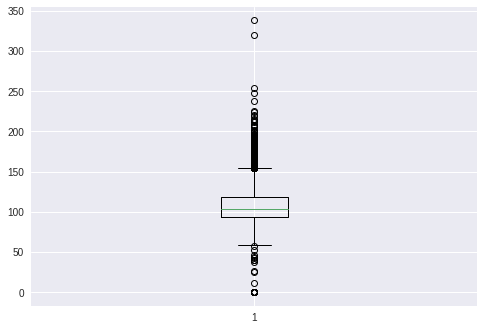

In [451]:
# Boxplot
plt.boxplot(movie_dataset['runtime'])
plt.show()

In [452]:
# Summary of runtime 
movie_dataset['runtime'].describe()

count    7375.000000
mean      107.646102
std        21.443071
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [453]:
# Correlation
pearsonr(movie_dataset.runtime, movie_dataset['revenue']) 

(0.19826153850967845, 2.928190398709838e-66)

In [454]:
# We add the median where runtime is zero
runtime_med = movie_dataset.runtime.median()
movie_dataset.runtime[movie_dataset.runtime == 0] = runtime_med

### Budget 

In [455]:
# Summary of budget 
movie_dataset['budget'].describe()

count    7.375000e+03
mean     2.234646e+07
std      3.657487e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.500000e+06
75%      2.800000e+07
max      3.800000e+08
Name: budget, dtype: float64

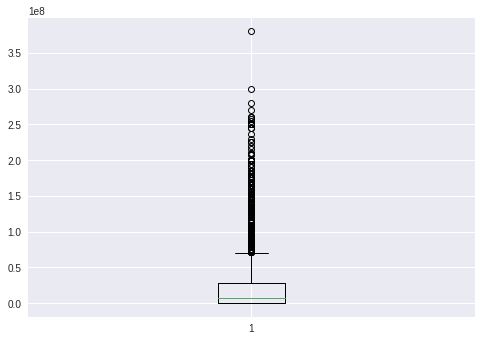

In [456]:
# Boxplot
plt.boxplot(movie_dataset['budget'])
plt.show()

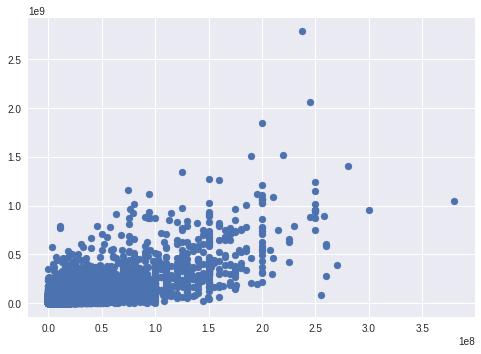

In [457]:
# Scatterplot
plt.scatter(movie_dataset['budget'] , movie_dataset['revenue'])
plt.show()

In [458]:
# Correlation 
pearsonr(movie_dataset.budget , movie_dataset.revenue)

(0.7426407751838312, 0.0)

In [459]:
# Number of examples with 0 value
sum(movie_dataset.budget == 0)

2020

In [460]:
movie_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   belongs_to_collection  7375 non-null   int64   
 1   budget                 7375 non-null   int64   
 2   genres                 7375 non-null   object  
 3   homepage               7375 non-null   int64   
 4   original_language      7375 non-null   object  
 5   popularity             7375 non-null   float64 
 6   production_companies   7375 non-null   object  
 7   production_countries   7375 non-null   object  
 8   revenue                7375 non-null   float64 
 9   runtime                7375 non-null   float64 
 10  spoken_languages       7375 non-null   object  
 11  vote_average           7375 non-null   float64 
 12  vote_count             7375 non-null   float64 
 13  cast                   7375 non-null   object  
 14  crew                   7364 non-null   o

In [461]:
# We will predict values for budget where budget value is 0

train_bud = copy.copy(movie_dataset[movie_dataset.budget != 0])
unknown_bud = copy.copy(movie_dataset[movie_dataset.budget == 0])
Y = train_bud.budget

X = train_bud[[ 'vote_count'  ,'popularity' , 'homepage' , 'revenue' , 
               'crew_number' , 'cast_number'  ,'release_year']]

newX = unknown_bud[['vote_count'  ,'popularity' , 'homepage' , 'revenue' , 
                    'crew_number' , 'cast_number'  ,'release_year' ]]



rfr = RandomForestRegressor(n_estimators= 100)
rfr.fit(X, Y)

predicted = rfr.predict(newX)
movie_dataset.budget[movie_dataset.budget == 0] = predicted

In [462]:
# New correlation
pearsonr(movie_dataset.budget , movie_dataset.revenue)

(0.7435154767444254, 0.0)

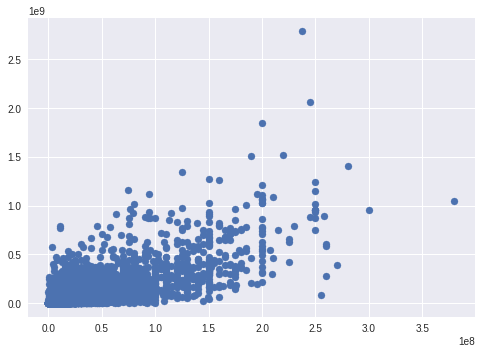

In [463]:
# New scatterplot
plt.scatter(movie_dataset['budget'] , movie_dataset['revenue'])
plt.show()

### Production companies

In [464]:
# Example of production companies example
movie_dataset['production_companies'][0][0]['name']

'Pixar Animation Studios'

In [465]:
# Here we get number of production companies in movie
def getprodcomnum(row):
    return len(row)

prod_com_number = movie_dataset['production_companies'].apply(lambda x: getprodcomnum(x))

In [466]:
# Summary of number of production companies
print('Median : ' + str(prod_com_number.median())) , prod_com_number.describe()

Median : 2.0


(None, count    7375.000000
 mean        2.744542
 std         2.186414
 min         0.000000
 25%         1.000000
 50%         2.000000
 75%         4.000000
 max        26.000000
 Name: production_companies, dtype: float64)

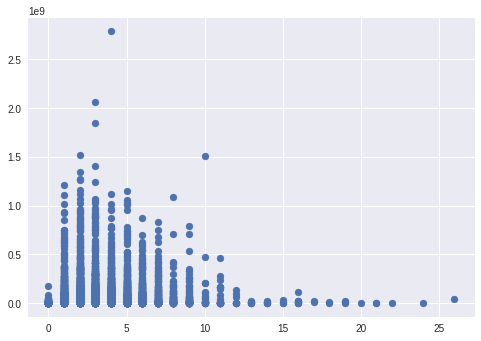

In [467]:
# Scatterplot of number of production companies and revenue
plt.scatter(prod_com_number, movie_dataset['revenue'])
plt.show()

In [468]:
# correlation of number of production companies
pearsonr(prod_com_number , movie_dataset['revenue'])

(0.11896297740940183, 1.1716282271876265e-24)

In [469]:
# Now we get the production companies names 
com = []
def getcomp(row):
    x = []
    for i in row:
        com.append(i['name'])
        x.append(i['name'])
    return x
  
companies = movie_dataset['production_companies'].apply(lambda x: getcomp(x))

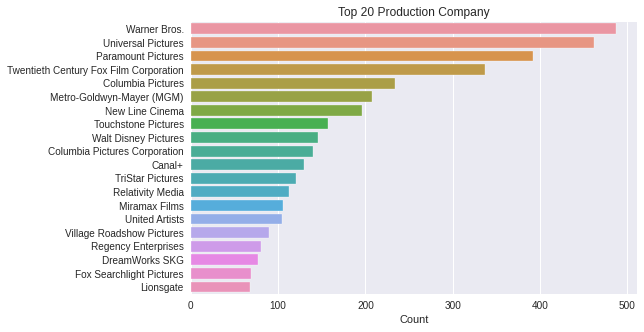

In [470]:
companies_count = collections.Counter([i for j in companies for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in companies_count],[val[0] for val in companies_count])
plt.xlabel('Count')
plt.title('Top 20 Production Company')
plt.show()

In [471]:
# We print number of classes for production companies 
setcom = set(com)
len(setcom)

7073

In [472]:
# Extracted names of companies 
companies.head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2             [Twentieth Century Fox Film Corporation]
3         [Sandollar Productions, Touchstone Pictures]
4    [Regency Enterprises, Forward Pass, Warner Bros.]
Name: production_companies, dtype: object

In [473]:
# We put the cleaned data insted of the old one 
movie_dataset.production_companies = companies

### Production countries 

In [474]:
# Example of a production country value 
movie_dataset['production_countries'][0]

[{'iso_3166_1': 'US', 'name': 'United States of America'}]

In [475]:
# We get the number of production countries involved in a movie
def getprodcouum(row):
    return len(row)

prod_cou_number = movie_dataset['production_countries'].apply(lambda x: getprodcouum(x))

In [476]:
# Summary of number of production countries
print('Median : ' + str(prod_cou_number.median())) , prod_cou_number.describe()

Median : 1.0


(None, count    7375.000000
 mean        1.334373
 std         0.791999
 min         0.000000
 25%         1.000000
 50%         1.000000
 75%         1.000000
 max        12.000000
 Name: production_countries, dtype: float64)

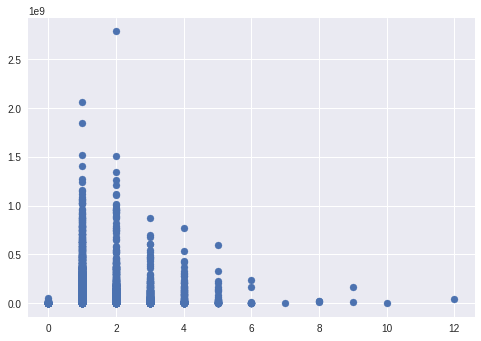

In [477]:
# Scatter plot 
plt.scatter(prod_cou_number, movie_dataset['revenue'])
plt.show()

In [478]:
# Correlation
pearsonr(prod_cou_number , movie_dataset['revenue'])

(0.031338825319962973, 0.007112832913368034)

In [479]:
# Now we get the nanes of production countries 
cou = []
def getnat(row):
    x = []
    for i in row:
        cou.append(i['iso_3166_1'])
        x.append(i['iso_3166_1'])
    return x
  
nations = movie_dataset.production_countries.apply(lambda x: getnat(x))

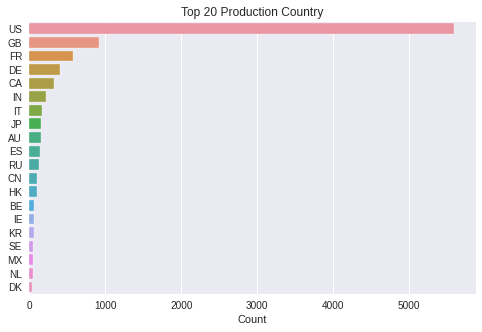

In [480]:
countries_count = collections.Counter([i for j in nations for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in countries_count],[val[0] for val in countries_count])
plt.xlabel('Count')
plt.title('Top 20 Production Country')
plt.show()

In [481]:
# Number of classes of production countries
setnat = set(cou)
len(setnat)

98

In [482]:
# We use the filtered names now 
movie_dataset.production_countries = nations

### Original and Spoken language

In [483]:
# We change the type to categorical instead of string  
movie_dataset['original_language'] = movie_dataset['original_language'].astype('category')

In [484]:
# Summary of original language 
movie_dataset.original_language.describe()

count     7375
unique      44
top         en
freq      6329
Name: original_language, dtype: object

Text(0.5, 1.0, 'Original languages')

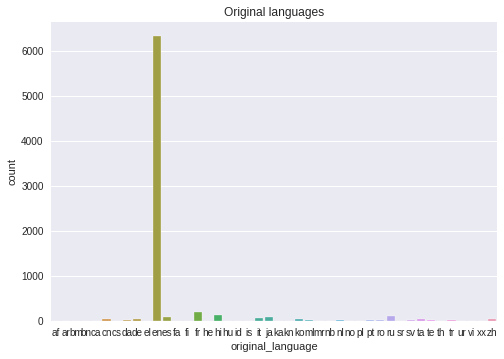

In [485]:
# Histogram of original language
movie_dataset.original_language = movie_dataset.original_language.astype('category')
sns.countplot(movie_dataset.original_language).set_title("Original languages")

In [486]:
# Number of spoken languages in a movie 
num_spoken = movie_dataset.spoken_languages.apply(lambda x : len(x) if len(x) > 0 else 0) 

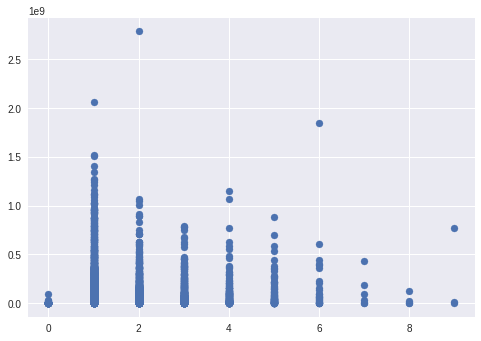

In [487]:
# Scatterplot 
plt.scatter(num_spoken , movie_dataset.revenue)
plt.show()

In [488]:
# Correlation
pearsonr(num_spoken , movie_dataset.revenue)

(0.07049496137724755, 1.3572613300824621e-09)

In [489]:
# We drop the spoken language feature 
movie_dataset = movie_dataset.drop(columns=['spoken_languages'])

We will use categorical original language , spoken we will not use since it is not important 

###Votes

In [490]:
# Summary of vote average 
movie_dataset.vote_average.describe()

count    7375.000000
mean        6.221397
std         1.013761
min         0.000000
25%         5.700000
50%         6.300000
75%         6.900000
max        10.000000
Name: vote_average, dtype: float64

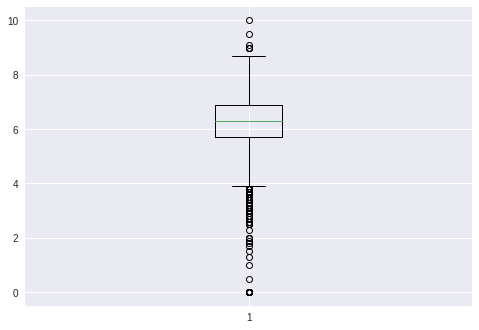

In [491]:
# Boxplot 
plt.boxplot(movie_dataset.vote_average)
plt.show()

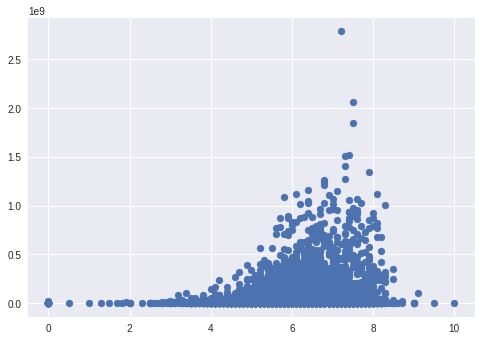

In [492]:
# Scatterplot 
plt.scatter(movie_dataset.vote_average , movie_dataset.revenue)
plt.show()

In [493]:
# Correlation
pearsonr(movie_dataset.vote_average,movie_dataset.revenue)

(0.1464778661760099, 1.1873014831076072e-36)

In [494]:
# Summary of vote count 
movie_dataset.vote_count.describe()

count     7375.000000
mean       551.517017
std       1087.566705
min          0.000000
25%         41.000000
50%        159.000000
75%        538.500000
max      14075.000000
Name: vote_count, dtype: float64

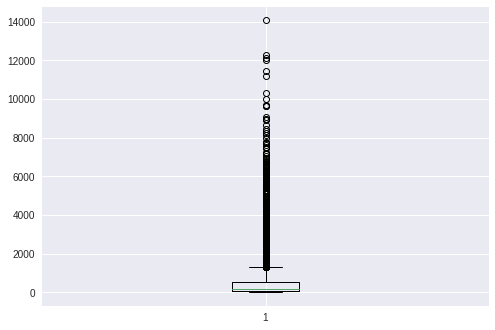

In [495]:
# Boxplot 
plt.boxplot(movie_dataset.vote_count)
plt.show()

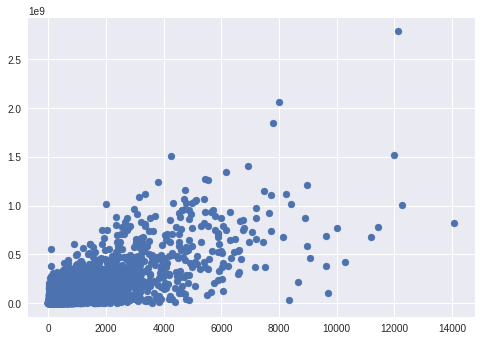

In [496]:
# Scatterplot 
plt.scatter(movie_dataset.vote_count , movie_dataset.revenue)
plt.show()

In [497]:
# Correlation
pearsonr(movie_dataset.vote_count,movie_dataset.revenue)

(0.7758983975375856, 0.0)

In [498]:
# We will fill all values with 0 with the median
vote_ave_med = movie_dataset.vote_average.median()
vote_count_med = movie_dataset.vote_count.median()

movie_dataset.vote_average[movie_dataset.vote_average == 0] = vote_ave_med
movie_dataset.vote_count[movie_dataset.vote_count == 0] = vote_count_med

###Revenue 

In [499]:
# Summary of the rvenue
movie_dataset.revenue.describe()

count    7.375000e+03
mean     6.779991e+07
std      1.440350e+08
min      1.000000e+00
25%      2.395116e+06
50%      1.670286e+07
75%      6.657980e+07
max      2.787965e+09
Name: revenue, dtype: float64

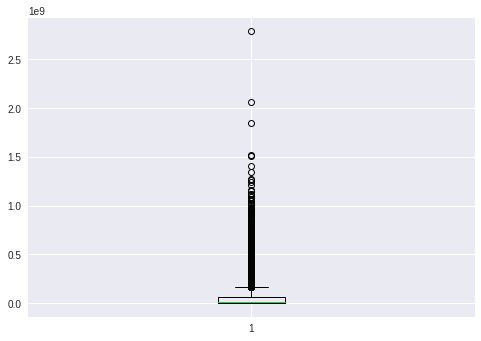

In [500]:
# Boxplot 
plt.boxplot(movie_dataset.revenue )
plt.show()

# Preparing dataset for the model

## Encoding categorical data

Now i will make two datasets :
1. With all columns after encoding 
2. With just the most important columns after encoding

In [501]:
large_dataset = copy.copy(movie_dataset) 
large_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   belongs_to_collection  7375 non-null   int64   
 1   budget                 7375 non-null   int64   
 2   genres                 7375 non-null   object  
 3   homepage               7375 non-null   int64   
 4   original_language      7375 non-null   category
 5   popularity             7375 non-null   float64 
 6   production_companies   7375 non-null   object  
 7   production_countries   7375 non-null   object  
 8   revenue                7375 non-null   float64 
 9   runtime                7375 non-null   float64 
 10  vote_average           7375 non-null   float64 
 11  vote_count             7375 non-null   float64 
 12  cast                   7375 non-null   object  
 13  crew                   7364 non-null   object  
 14  crew_number            7375 non-null   i

### Genre 


In [502]:
large_dataset = large_dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(large_dataset.pop('genres')),
                index=large_dataset.index,
                columns=mlb.classes_))

### Production countries

In [503]:
large_dataset = large_dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(large_dataset.pop('production_countries')),
                index=large_dataset.index,
                columns=mlb.classes_))

### Production companies

In [504]:
large_dataset = large_dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(large_dataset.pop('production_companies')),
                index=large_dataset.index,
                columns=mlb.classes_))

### Cast

In [505]:
# Because those names exist also as production companies 
# i changed their names before encoding
large_dataset.cast[561][1] = 'Walter Elias Disney' 
large_dataset.cast[4709][2] = 'Don Blutch'
large_dataset.cast[5941][0] = 'Coco '

large_dataset = large_dataset.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(large_dataset.pop('cast')),
                index=large_dataset.index,
                columns=mlb.classes_))

### Crew 

In [506]:
# Because a high number of actors also direct movies ,we have a problem of 
# pair column names se we decided to ad _dir to the end of every actor who is in directors column

directors = pd.get_dummies(directors, sparse=True)

dir_col = directors.columns
data_col =   large_dataset.columns

cols = []
index = 0

for d in dir_col:
    for m in data_col:
        if d == m :
            cols.append(d)
    index = index +1

for i in directors.columns:
    if i in cols:
        directors.rename(columns = {i: i + '_dir' }, inplace = True) 

large_dataset = large_dataset.join(directors)

### Original language

In [507]:
org_lan = pd.get_dummies(movie_dataset.original_language, sparse=True)
large_dataset = large_dataset.join(org_lan)

### Release day of the week 


In [508]:
release_dow_dummy = pd.get_dummies(large_dataset.release_dow, sparse=True)
release_dow_dummy.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [509]:
# We rename the columns to days names
release_dow_dummy.rename(columns = {0:'Monday'}, inplace = True) 
release_dow_dummy.rename(columns = {1:'Tuesday'}, inplace = True) 
release_dow_dummy.rename(columns = {2:'Wednesday' }, inplace = True) 
release_dow_dummy.rename(columns = {3: 'Thursday' }, inplace = True) 
release_dow_dummy.rename(columns = {4:'Friday' }, inplace = True) 
release_dow_dummy.rename(columns = {5:'Saturday'}, inplace = True) 
release_dow_dummy.rename(columns = {6:'Sunday'}, inplace = True) 
release_dow_dummy.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [510]:
# An example of how it looks at the end 
release_dow_dummy.head()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
0       1        0          0         0       0         0       0
1       0        0          0         0       1         0       0
2       0        0          0         0       1         0       0
3       0        0          0         0       1         0       0
4       0        0          0         0       1         0       0

In [511]:
# We add the columns to our dataset 
large_dataset = large_dataset.join(release_dow_dummy)

### Release month

In [512]:
release_month_dummy = pd.get_dummies(large_dataset.release_month, sparse=True)
large_dataset = large_dataset.join(release_month_dummy)

## Making small dataset and removing encoded features

In [513]:
# We drop all data that is not numeric
datatype = large_dataset.dtypes
useless_columns = datatype[(datatype == 'object') | (datatype == 'category')].index.tolist()
large_dataset= large_dataset.drop(columns = useless_columns)

# We print the shape of our large dataset
large_dataset.shape 

(7375, 18950)

In [514]:
# Here we extract all column which have a higher correlation that 15 % 
# and add them to our new small dataset
corr= []
for col in large_dataset.columns:
    corr.append(pearsonr(large_dataset[col], large_dataset.revenue)[0])

ind = 0
indexes = []
for i in corr:
    if i > 0.15 or i < - 0.15 :
        indexes.append(ind)
    ind = ind + 1 

small_dataset = large_dataset.iloc[:, indexes]
# Info about new dataset
small_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype           
---  ------                    --------------  -----           
 0   belongs_to_collection     7375 non-null   int64           
 1   budget                    7375 non-null   int64           
 2   homepage                  7375 non-null   int64           
 3   popularity                7375 non-null   float64         
 4   revenue                   7375 non-null   float64         
 5   runtime                   7375 non-null   float64         
 6   vote_count                7375 non-null   float64         
 7   crew_number               7375 non-null   int64           
 8   cast_number               7375 non-null   int64           
 9   Action                    7375 non-null   Sparse[int64, 0]
 10  Adventure                 7375 non-null   Sparse[int64, 0]
 11  Animation                 7375 non-null   Sparse[int64, 

# Model training and evaluation

In [515]:
large_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375 entries, 0 to 7374
Columns: 18950 entries, belongs_to_collection to 12
dtypes: Sparse[int64, 0](15519), Sparse[uint8, 0](3420), float64(5), int64(6)
memory usage: 1.6 MB


### Splitting data

In [ ]:
Y_s = small_dataset.revenue
X_s = small_dataset.drop(columns= ['revenue']) 

X_train_small , X_test_small , Y_train_small , Y_test_small = train_test_split(X_s , Y_s , test_size = 0.2 , random_state = 0)

In [ ]:
Y_h = large_dataset.revenue
X_h = large_dataset.drop(columns= ['revenue']) 

X_train_large , X_test_large , Y_train_large , Y_test_large = train_test_split(X_h , Y_h , test_size = 0.2 , random_state = 0)

## Linear regression

Large dataset

In [ ]:
# Training linear regression for large dataset 
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_large, Y_train_large)
accuracy = linear_regressor.score(X_test_large, Y_test_large)
print('Large dataset :')
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: -5661.73


Encoded Dataset

In [ ]:
# Encoding 
standardScalerX = StandardScaler()
X_train_std = standardScalerX.fit_transform(X_train_large)
X_test_std = standardScalerX.fit_transform(X_test_large)

norm = MinMaxScaler().fit(X_train_large)
X_train_norm = norm.transform(X_train_large)
X_test_norm = norm.transform(X_test_large)

In [ ]:
# Training linear regression for large scaled dataset 
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_std, Y_train_large)
accuracy = linear_regressor.score(X_test_std, Y_test_large)
print('Large standardized dataset :')
print('Accuracy: %.2f' % (accuracy*100))

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_norm, Y_train_large)
accuracy = linear_regressor.score(X_test_norm, Y_test_large)
print('Large normalized dataset :')
print('Accuracy: %.2f' % (accuracy*100))

Large standardized dataset :
Accuracy: -5665.62
Large normalized dataset :
Accuracy: -6992.51


Small dataset

In [ ]:
# Training linear regression for small dataset 
linear_regressor.fit(X_train_small, Y_train_small)
accuracy = linear_regressor.score(X_test_small, Y_test_small)
print('Small dataset :')
print('Accuracy: %.2f' % (accuracy*100))
print(pd.DataFrame(linear_regressor.coef_, X_train_small.columns, columns = ['Coeff']))

Small dataset :
Accuracy: 71.55
                                 Coeff
belongs_to_collection     3.833056e+07
budget                    1.653146e+00
homepage                 -1.517022e+06
popularity                8.701887e+05
runtime                   2.864007e+05
vote_count                6.100846e+04
crew_number              -3.018579e+05
cast_number               1.001495e+05
Action                   -1.278727e+07
Adventure                 7.701161e+06
Animation                 1.393120e+07
Drama                    -2.902002e+06
Family                    1.405003e+07
Fantasy                  -6.260577e+06
US                        9.687712e+05
DreamWorks Animation      9.245446e+07
Heyday Films              7.180798e+07
Lightstorm Entertainment  2.026653e+08
Marvel Studios            1.889094e+07
Pixar Animation Studios   7.181373e+07
Walt Disney Pictures      1.052107e+07
Daisy Ridley              1.158475e+09
Emma Watson              -1.055178e+07
Ian McKellen              9.1936

In [ ]:
# Predicted vs actual values reveue
Y_test_small = Y_test_small.values
print(np.concatenate((predicted.reshape(len(predicted),1), Y_test_small.reshape(len(Y_test_small),1)),1)[0 :10 ,])

[[2.62163375e+07 2.35308310e+07]
 [1.29554321e+07 1.00000000e+07]
 [7.38665448e+07 6.88968290e+07]
 [5.88387109e+06 2.40388500e+06]
 [7.75080900e+07 4.54652990e+07]
 [1.58539220e+07 2.38227000e+05]
 [3.26336331e+06 6.06410000e+04]
 [2.68598260e+07 1.00000000e+06]
 [1.28343298e+06 1.70832000e+05]
 [2.42621240e+08 7.64327270e+07]]


In [ ]:
# Scaling small dataset
X_train_std = standardScalerX.fit_transform(X_train_small)
X_test_std = standardScalerX.fit_transform(X_test_small)

norm = MinMaxScaler().fit(X_train_small)
X_train_norm = norm.transform(X_train_small)
X_test_norm = norm.transform(X_test_small)

In [ ]:
# training linear regression model with small standardized 
linear_regressor.fit(X_train_std, Y_train_small)
accuracy = linear_regressor.score(X_test_std, Y_test_small)
print('Small standardized dataset :')
print('Accuracy: %.2f' % (accuracy*100))
print(pd.DataFrame(linear_regressor.coef_, X_train_small.columns, columns = ['Coeff']))

0.6968605098534877

In [ ]:
# training linear regression model with small normalized 
linear_regressor.fit(X_train_norm, Y_train_small)
accuracy = linear_regressor.score(X_test_small, Y_test_small)
print('Small normalized dataset :')
print('Accuracy: %.2f' % (accuracy*100))
print(pd.DataFrame(linear_regressor.coef_, X_train_small.columns, columns = ['Coeff']))

0.715536249041475

## Random Forest Regression

Large dataset

In [ ]:
# Training RFR model with large unscaled dataset 
regressor = RandomForestRegressor(n_estimators= 1000 , random_state= 0 )
regressor.fit(X_train_large,Y_train_large)
predicted = regressor.predict(X_test_large)
r2_score(Y_test_large , predicted) 

0.802305424632872

In [ ]:
regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Predicted vs actual values reveue
Y_test_large = Y_test_large.values
print(np.concatenate((predicted.reshape(len(predicted),1), Y_test_large.reshape(len(Y_test_large),1)),1)[0 : 15 , ])

[[1.76302018e+07 2.35308310e+07]
 [9.82620918e+06 1.00000000e+07]
 [4.22047377e+07 6.88968290e+07]
 [1.82346294e+06 2.40388500e+06]
 [8.51585342e+07 4.54652990e+07]
 [1.53711320e+07 2.38227000e+05]
 [1.54206119e+06 6.06410000e+04]
 [4.16733596e+06 1.00000000e+06]
 [2.77597802e+05 1.70832000e+05]
 [2.11761690e+08 7.64327270e+07]
 [9.16576231e+07 1.45896422e+08]
 [1.20341092e+07 2.20000000e+06]
 [1.58969335e+07 1.16422540e+07]
 [2.55367709e+08 2.27817248e+08]
 [2.96023889e+08 3.11950384e+08]]


In [ ]:
# Scaling large dataset
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X_train_std = standardScalerX.fit_transform(X_train_large)
X_test_std = standardScalerX.fit_transform(X_test_large)

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train_large)
X_train_norm = norm.transform(X_train_large)
X_test_norm = norm.transform(X_test_large)

In [ ]:
# Training linear regression for large normalized dataset 
regressor = RandomForestRegressor(n_estimators= 1000 , random_state= 0 )
regressor.fit(X_train_norm,Y_train_large)
predicted = regressor.predict(X_test_norm)
r2_score(Y_test_large , predicted) # 80.1

0.8019065662699438

In [ ]:
# Training linear regression for large standardized  dataset 

regressor = RandomForestRegressor(n_estimators= 1000 , random_state= 0 )
regressor.fit(X_train_std,Y_train_large)
predicted = regressor.predict(X_test_std)
r2_score(Y_test_large , predicted)# 78.5

0.7851443819520628

Small dataset 

In [ ]:
# Training linear regression for small unscled dataset 

regressor = RandomForestRegressor(n_estimators= 100 , random_state= 0 )
regressor.fit(X_train_small,Y_train_small)
predicted = regressor.predict(X_test_small)
r2_score(Y_test_small , predicted) # 77.4

0.7714715968353235

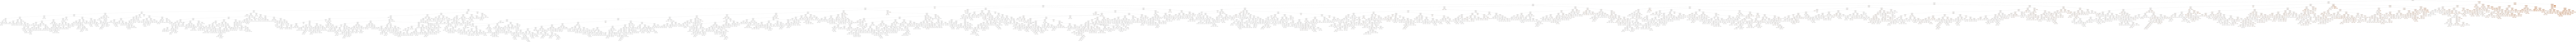

In [ ]:
# Drawing the RFR

estimator = regressor.estimators_[5]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train_small.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
regressor

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
# Predicted vs actual values reveue
Y_test_small = Y_test_small.values
print(np.concatenate((predicted.reshape(len(predicted),1), Y_test_small.reshape(len(Y_test_small),1)),1)[0 : 15 , ])

[[2.62163375e+07 2.35308310e+07]
 [1.29554321e+07 1.00000000e+07]
 [7.38665448e+07 6.88968290e+07]
 [5.88387109e+06 2.40388500e+06]
 [7.75080900e+07 4.54652990e+07]
 [1.58539220e+07 2.38227000e+05]
 [3.26336331e+06 6.06410000e+04]
 [2.68598260e+07 1.00000000e+06]
 [1.28343298e+06 1.70832000e+05]
 [2.42621240e+08 7.64327270e+07]
 [7.55326970e+07 1.45896422e+08]
 [2.14352402e+07 2.20000000e+06]
 [1.71015296e+07 1.16422540e+07]
 [2.68544389e+08 2.27817248e+08]
 [2.79585874e+08 3.11950384e+08]]


In [ ]:
# Scaling the small dataset
X_train_std = standardScalerX.fit_transform(X_train_small)
X_test_std = standardScalerX.fit_transform(X_test_small)

norm = MinMaxScaler().fit(X_train_small)
X_train_norm = norm.transform(X_train_small)
X_test_norm = norm.transform(X_test_small)

In [ ]:
# Training small normalized dataset
regressor = RandomForestRegressor(n_estimators= 100 , random_state= 0 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
r2_score(Y_test_small , predicted) # 77.3

0.773343018744862

In [ ]:
# Training small standardized dataset
regressor = RandomForestRegressor(n_estimators= 100 , random_state= 0 )
regressor.fit(X_train_std,Y_train_small)
predicted = regressor.predict(X_test_std)
r2_score(Y_test_small , predicted) # 74.9

0.7492376916873942

## ANN

In [ ]:
# Scaling the large dataset

from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X_train_std = standardScalerX.fit_transform(X_train_large)
X_test_std = standardScalerX.fit_transform(X_test_large)

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train_large)
X_train_norm = norm.transform(X_train_large)
X_test_norm = norm.transform(X_test_large)

Large dataset 

In [ ]:
# We need the input number to input for ANN
X_train_large.shape

(5900, 18949)

In [ ]:
# Training the ANN with standardized large dataset

model = Sequential()
model.add(Dense(100, input_dim=18949, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_std, Y_train_large , epochs=1000, verbose=0)
predicted = model.predict(X_test_std)
r2_score(Y_test_large , predicted) # 48.5

0.4848459284958422

In [ ]:
# Training the ANN with normalized large dataset

model = Sequential()
model.add(Dense(100, input_dim=18949, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_norm, Y_train_large , epochs=1000, verbose=0)
predicted = model.predict(X_test_norm)
r2_score(Y_test_large , predicted) # 43.5

0.43531016714063697

Small dataset 

In [516]:
# Scalling the small dataset
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X_train_std = standardScalerX.fit_transform(X_train_small)
X_test_std = standardScalerX.fit_transform(X_test_small)

from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train_small)
X_train_norm = norm.transform(X_train_small)
X_test_norm = norm.transform(X_test_small)

In [517]:
# Training ANN model with small normalized model
# and drawing the neural network

model = Sequential()
model.add(Dense(30, input_dim=27, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam' , metrics=['mse','mae'])
model.fit(X_train_norm, Y_train_small , epochs=1000, verbose=0)
predicted = model.predict(X_test_norm) 
r2_score(Y_test_small, predicted) # 77.2 for small dataset

0.7620710245139208

In [ ]:
# Vizualizing our ANN model
ann_viz(model, view=True, title="Movie predictor ANN")

In [518]:
# Training ANN model with small normalized model

model = Sequential()
model.add(Dense(40, input_dim=27, 
                activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu')) 
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.fit(X_train_std, Y_train_small, 
          epochs=500, verbose=0)
predicted = model.predict(X_test_std)
r2_score(Y_test_small, predicted) 

0.7450045857757069

In [ ]:
# We will run different ANN model with different layer numbers 
# Also we changed th enodes number 

print('### Small node number ### \n')

for i in range(1,10):
    model = Sequential()
    model.add(Dense(100, input_dim=27, activation='relu'))
    for layers in range(0,i):
        model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train_std, Y_train_small, epochs=500, verbose=0)
    predicted = model.predict(X_test_std)
    r2 = r2_score(Y_test_small, predicted)
    print('Number : ' + str(i) + ' r2score : ' + str(r2))

print()
print('### Large node number ###\n')

for i in range(1,10):
    model = Sequential()    
    model.add(Dense(100, input_dim=27, activation='relu'))
    for layers in range(0,i):
        model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train_std, Y_train_small, epochs=500, verbose=0)
    predicted = model.predict(X_test_std)
    r2 = r2_score(Y_test_small, predicted)
    print('Number : ' + str(i) + ' r2score : ' + str(r2))

### Small node number ### 

Number : 1 r2score : 0.6789845733203297
Number : 2 r2score : 0.7016334424479822
Number : 3 r2score : 0.7047282210879242
Number : 4 r2score : 0.7141346143636231
Number : 5 r2score : 0.7563318772627833
Number : 6 r2score : 0.746477796175834
Number : 7 r2score : 0.7140102002829531
Number : 8 r2score : 0.7255701927222327
Number : 9 r2score : 0.7066623924297952

### Large node number ###

Number : 1 r2score : 0.6978276178049678
Number : 2 r2score : 0.7028582374695085
Number : 3 r2score : 0.7184415190900537
Number : 4 r2score : 0.716230999452663
Number : 5 r2score : 0.7133154414830811
Number : 6 r2score : 0.6532854637063041
Number : 7 r2score : 0.6731633598260169
Number : 8 r2score : 0.6079540411107791
Number : 9 r2score : 0.6116076016162988


## Improving the best model

In [ ]:
# To better understand each parameter of the model we will train a model with variety of different parameters

regressor = RandomForestRegressor(n_estimators= 100)
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('Less number of trees in the forest : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000)
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nMore number of trees in the forest : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , min_samples_leaf=1 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nSmaller number for minimum of samples required to be at a leaf node : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , min_samples_leaf=10 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nLarger number for minimum of samples required to be at a leaf node : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , max_features=0.5 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nNumber of features to consider when looking for the best split is 0.5 : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , max_features=1 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nNumber of features to consider when looking for the best split is 1 : %.2f'  % (100*r2_score(Y_test_small , predicted)))

regressor = RandomForestRegressor(n_estimators= 1000 ,  max_features='sqrt' )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nNumber of features to consider when looking for the best split is sqrt : %.2f'  % (100*r2_score(Y_test_small , predicted)))

regressor = RandomForestRegressor(n_estimators= 1000 ,  max_features='log2')
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nNumber of features to consider when looking for the best split is log2 : %.2f'  % (100*r2_score(Y_test_small , predicted)))

regressor = RandomForestRegressor(n_estimators= 1000 , max_depth = 5 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nMaximal depth of tree is 5 : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , max_depth = 20 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nMaximal depth of tree is 20 : %.2f'  % (100*r2_score(Y_test_small , predicted))) 

regressor = RandomForestRegressor(n_estimators= 1000 , max_depth = 100 )
regressor.fit(X_train_norm,Y_train_small)
predicted = regressor.predict(X_test_norm)
print('\nMaximal depth of tree is 100 : %.2f'  % (100*r2_score(Y_test_small , predicted))) 


Less number of trees in the forest : 77.61

More number of trees in the forest : 77.44

Smaller number for minimum of samples required to be at a leaf node : 77.70

Larger number for minimum of samples required to be at a leaf node : 77.70

Number of features to consider when looking for the best split is 0.5 : 79.37

Number of features to consider when looking for the best split is 1 : 76.96

Number of features to consider when looking for the best split is sqrt : 79.68

Number of features to consider when looking for the best split is log2 : 78.96

Maximal depth of tree is 5 : 76.82

Maximal depth of tree is 20 : 77.66

Maximal depth of tree is 100 : 77.58


In [ ]:
# Applying from the prvious output we traind a new model on the large dataset
regressor = RandomForestRegressor(n_estimators= 1000 ,
                                  max_features=0.5)

regressor.fit(X_train_large,Y_train_large)
predicted = regressor.predict(X_test_large)
print('The improved model for RFR : %.2f' 
      % (100*r2_score(Y_test_large , predicted)))

The improved model for RFR : 81.25
